# Baseball case study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

-- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. 

In [1]:
# Let's import the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df=pd.read_csv("baseball.csv")
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


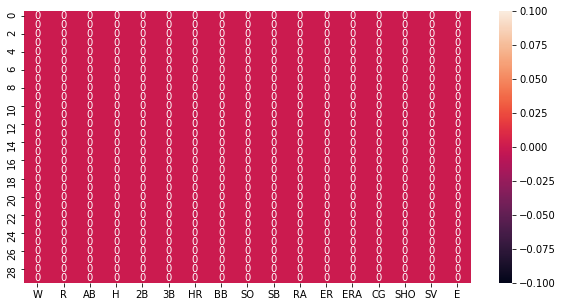

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [14]:
# Let's see if there are any null values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),annot=True)
plt.show()
df.isnull().sum()

# We can see below that there are no null Values

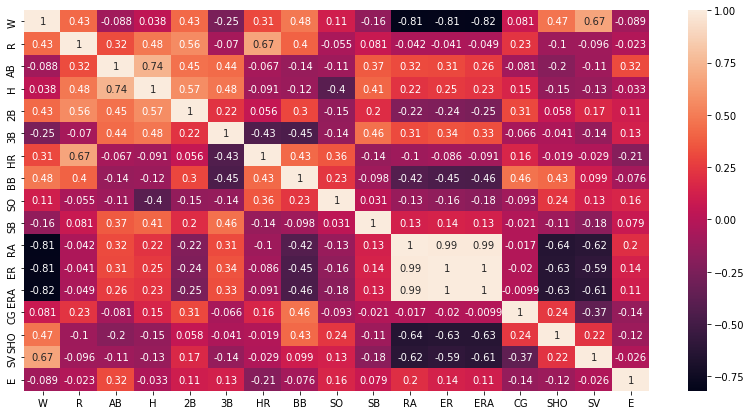

In [22]:
# Now, Let's see how the features are correlated
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

The heat plot shows that:

* ER, RA and ERA features are highly correlated among each other (almost 1)
* ER, RA and ERA features have strong negative correlation with respect to wins (W) (0.81)
* SV has decent correlation with W (Win) (0.67)

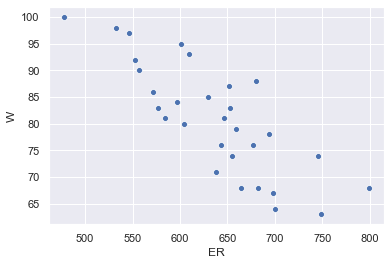

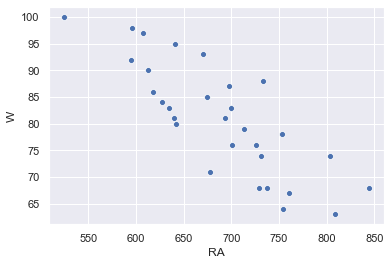

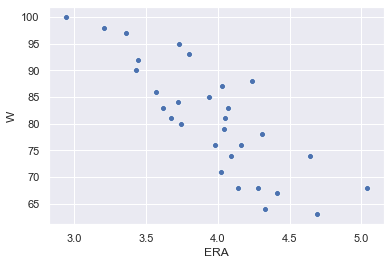

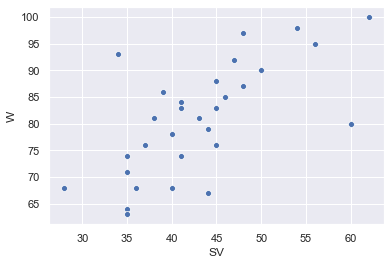

In [52]:
# Let's visualize ER, RA and ERA features with respect to W
l=['ER','RA','ERA','SV']
for i in l:
    sns.set()
    sns.scatterplot(data=df,x=i,y='W')
    plt.show()
    
# As Excepected we see a strong negative correlations other than SV which has decent positive correlation

In [53]:
# Let's describe the dataset
df.describe(include = 'all')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


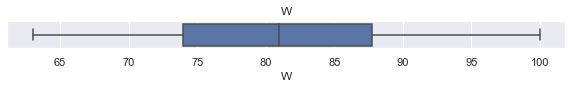

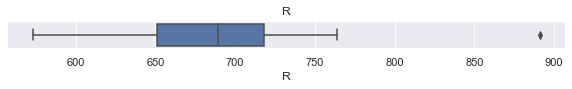

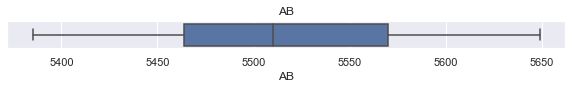

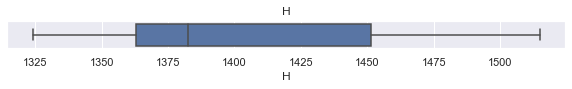

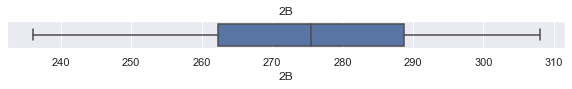

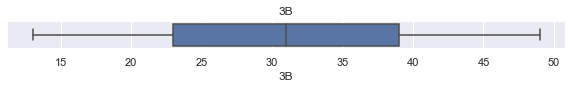

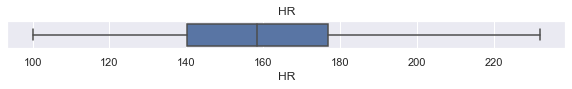

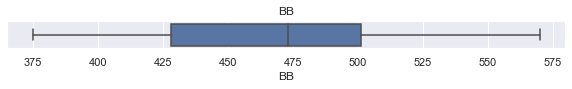

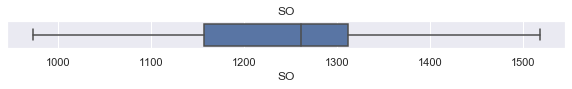

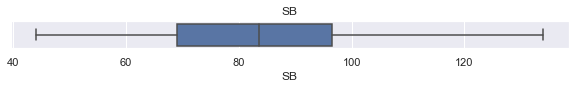

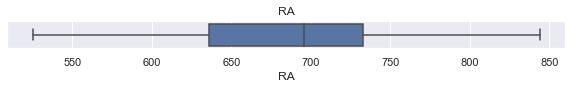

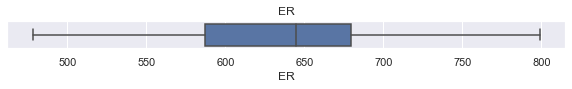

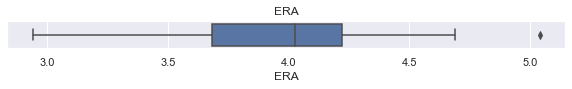

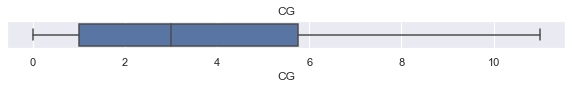

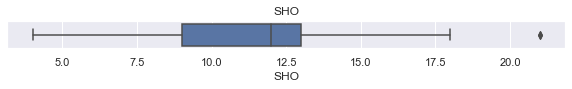

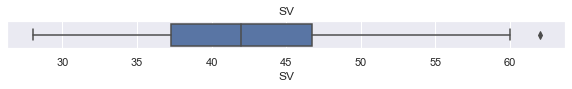

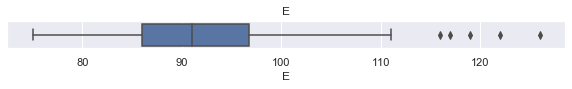

In [61]:
# We seem to be very few outliers. Let's plot and see

for i in df.columns:
    plt.figure(figsize=(10,0.5))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

# Only 'E' has a few outliers, others have 1 or none outliers. Let's use z scores to remove them

In [62]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)


(30, 17)
(29, 17)


In [63]:
#1 row was removed

In [65]:
# Let's now divide the dataset into target and features. we know that our target/label is 'W'
df_x=df.drop('W',axis=1)
y=df[['W']]

In [66]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [67]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [68]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [73]:
# PCA is required for the analysis to reduce curse of Dimensionality
from sklearn.decomposition import PCA
for i in range(5,17):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

5  variance :0.783562457239664
6  variance :0.8466718317811214
7  variance :0.8839732992639071
8  variance :0.9155279641135765
9  variance :0.9427152798526195
10  variance :0.9633980902689933
11  variance :0.9792463029438402
12  variance :0.988475585295784
13  variance :0.9969147886562172
14  variance :0.9997297569544167
15  variance :0.9999806807323313
16  variance :0.9999999999999999


In [78]:
# We find that after 13 the variance is almost the same so the remaining are redundant. Lets use n_components=13
pca = PCA(n_components=13)
x=pca.fit_transform(x)

In [79]:
x.shape

(29, 13)

# We need Regression so let's start with
# Linear Regression


In [80]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
r_state=maxr2_score(lm,x,y)

max r2 score corresponding to  75  is  0.9559869681406145


# Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 50}

In [83]:
rfr=RandomForestRegressor(n_estimators=50)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  82  is  0.7238104063805545


# KNN Regressor

In [85]:

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 5}

In [86]:
knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  71  is  0.7998206278026903


# SVR

In [87]:

from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [88]:
svr=SVR(kernel="linear",C=1)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  75  is  0.9564086813038677


# Cross Validation of Linear Regression and SVR

We found that Linear Regression and Support Vector Regressor Models are best suited

In [91]:
print("\n\nLinear Regression\n\n")
model_evaluation(lm,x,y)


print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y)



Linear Regression


Mean r2 score for regressor:  0.13727784235040158
standard deviation in r2 score for regressor:  0.9664136411447983
[ 0.48538183 -1.77406697  0.56387554  0.52202808  0.88917073]


SVM REGRESSOR


Mean r2 score for regressor:  0.260262279854628
standard deviation in r2 score for regressor:  1.0063791977912029
[ 0.6319909  -1.74797984  0.80110477  0.80503148  0.81116408]


In [92]:
# Based on above results let's select SV Regressor

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 75,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [100]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.4271140009889858
r2_score is:  0.9564086813038677


In [103]:
from sklearn.externals import joblib
joblib.dump(svr,'Baseball_win.pkl')

['Baseball_win.pkl']